## Linear Regression

### Load the Pumpkin data
Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data:
- Only get pumpkins priced by the bushel
- Convert the date to a month
- Calculate the price to be an average of high and low prices
- Convert the price to reflect the pricing by bushel quantity

1. Prepare the dataset

      Month  DayofYear    Variety       City               Package  Low Price  \
70        9        267   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      15.00   
71        9        267   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      18.00   
72       10        274   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      18.00   
73       10        274   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      17.00   
74       10        281   PIE TYPE  BALTIMORE  1 1/9 bushel cartons      15.00   
...     ...        ...        ...        ...                   ...        ...   
1738      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      15.00   
1739      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      13.75   
1740      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      10.75   
1741      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      12.00   
1742      9        273  MINIATURE  ST. LOUIS    1/2 bushel cartons      12.00   

      High Price      Price

/var/folders/lx/bt6372hd2fq1t__yfh69dpyc0000gn/T/ipykernel_8479/1657321381.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


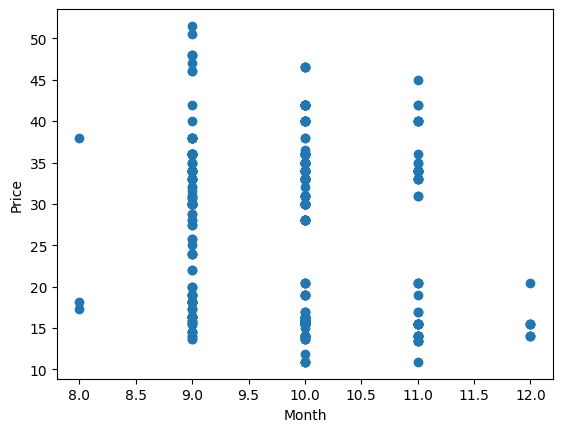

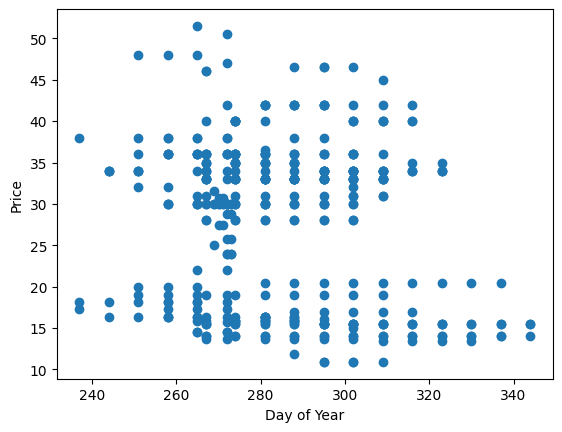

In [40]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from datetime import datetime 

# Load the data from file
pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins.head()

# Select useful columns 
columns_to_use = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins =pumpkins.loc[:, columns_to_use]

# Define new data array: price, month, day of year 
price = (pumpkins['Low Price'] + pumpkins['High Price'])/2
month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

# Create new dataframe
new_pumpkins = pd.DataFrame(
    {'Month': month,
    'DayofYear': day_of_year,
    'Variety': pumpkins['Variety'],
    'City': pumpkins['City Name'],
    'Package': pumpkins['Package'],
    'Low Price': pumpkins['Low Price'],
    'High Price': pumpkins['High Price'],
    'Price': price}
)

# Standardize the price amount 
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = new_pumpkins['Price']/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = new_pumpkins['Price']*2

# Print the data
#new_pumpkins.head()
print(new_pumpkins)

# Show the data
plt.scatter('Month', 'Price', data=new_pumpkins)
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

plt.scatter('DayofYear', 'Price', data=new_pumpkins)
plt.xlabel("Day of Year")
plt.ylabel("Price")
plt.show()

### Correlation and Variety

2. Calculate the correlation using the `corr` function

In [41]:
# Print the correlation
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayofYear'].corr(new_pumpkins['Price']))

-0.14878293554077526
-0.1667332249274541


3. Plot the price based on all the varieties
Color each variety a different color for the Day of Year graph.

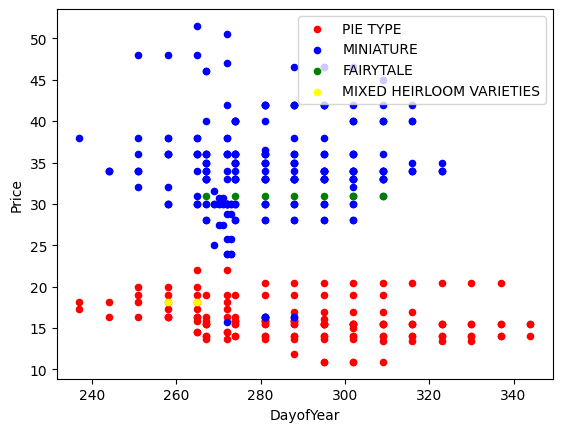

In [42]:
ax = None
colors = ['red', 'blue', 'green', 'yellow']
for i, var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety'] == var]
    ax = df.plot.scatter('DayofYear', 'Price', ax=ax, c=colors[i], label=var)

4. Plot the bar graph of price based on variety

<Axes: xlabel='Variety'>

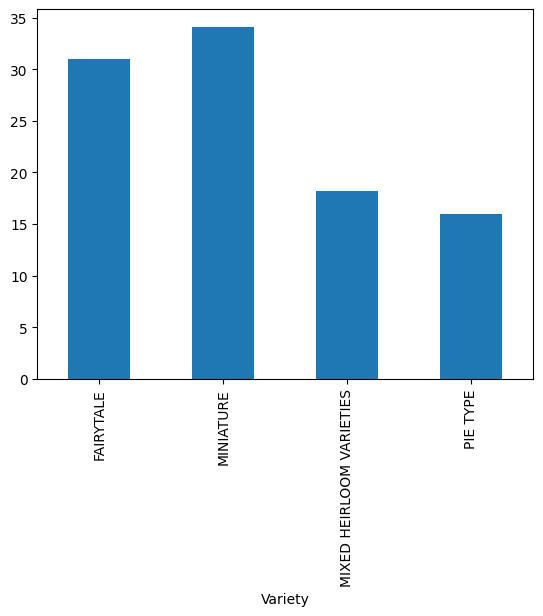

In [43]:
# Bar plot of price based on variety
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

5. Plot price based one pumpkin variety

<Axes: xlabel='DayofYear', ylabel='Price'>

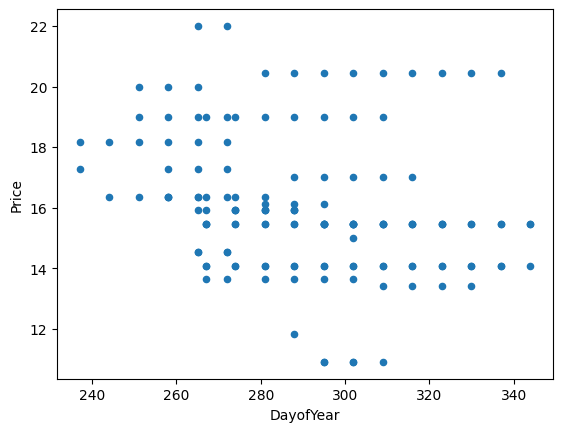

In [44]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety'] == 'PIE TYPE']
pie_pumpkins.plot.scatter('DayofYear', 'Price')

In [45]:
# Calculate the correlation
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int32  
 1   DayofYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   City        144 non-null    object 
 4   Package     144 non-null    object 
 5   Low Price   144 non-null    float64
 6   High Price  144 non-null    float64
 7   Price       144 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 9.6+ KB


/var/folders/lx/bt6372hd2fq1t__yfh69dpyc0000gn/T/ipykernel_8479/2634306684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


### Linear Regression
To train our linear regression model, we will use the Scikit-learn library.

In [46]:
# Import the library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

6. Separate the input values (features) with the output values (labels)

In [47]:
# Define X and Y values
X = pie_pumpkins['DayofYear'].to_numpy().reshape(-1,1)
Y = pie_pumpkins['Price']

7. Split the data into training datasets and testing datasets

In [48]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

8. Training the actual Linear Regression model

In [49]:
# Load the model and fit with datasets
linear_reg = LinearRegression()
linear_reg.fit(X_train, y=Y_train)

LinearRegression()

9. Predict the prices after training the model, then calculate the mean square error and coefficient of determination

In [50]:
# Predict value after training the model
pred = linear_reg.predict(X_test)
mse = np.sqrt(mean_squared_error(Y_test, pred))
print(f'Mean Square Error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

# Calculate the coefficient of determination
score = linear_reg.score(X_train, Y_train)
print(f'Coefficient of Determination: ', score)

Mean Square Error: 2.77 (17.2%)
Coefficient of Determination:  0.04460606335028361


10. Plot the data - training set and linear regression line

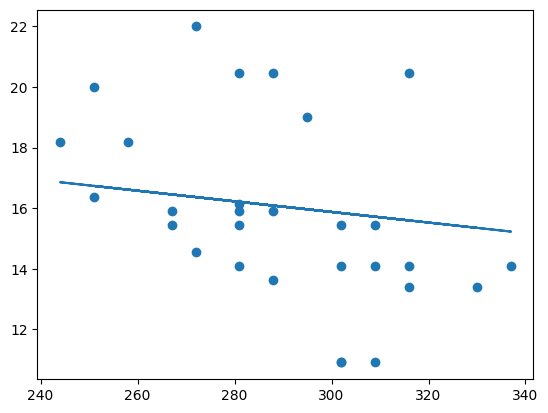

In [51]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, pred)

### Polynomial Regression
Polynomial regression creates a curved line to better fit nonlinear data.

In [52]:
# Import library
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

11. Create a pipeline that first adds polynomial features, then trains the regression

In [53]:
# Create a pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

12. Plot the data - training set and polynomial regression line

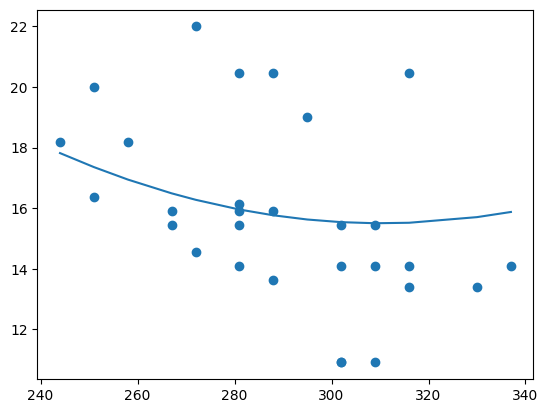

In [57]:
poly_pred = pipeline.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(sorted(X_test), pipeline.predict(sorted(X_test)))